In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df2 = pd.read_csv('NOAA_Reef_Check__Bleaching_Data.csv')

In [3]:
# Writing a function to explore each dataset

def explore_dataset(df):
    # Checking the shape of the dataset
    print("Shape of the dataset:", df.shape)
    print("\n")
    
    # Displaying the first few rows of the dataset
    print("First few rows of the dataset:")
    display(df.head())
    print("\n")
    
    # Getting information about the dataset
    print("Information about the dataset:")
    display(df.info())
    print("\n")
    
    # Checking for duplicated values per column
    duplicated_values_per_column = df.duplicated().any()
    print("Duplicated values per column:")
    display(duplicated_values_per_column)
    print("\n")
    
    # Counting duplicated values per column
    count_duplicated_values_per_column = duplicated_values_per_column.sum()
    print("Number of duplicated values per column:", count_duplicated_values_per_column)
    print("\n")
    
    # Checking for missing values
    print("Missing values per column:")
    display(df.isnull().sum())
    print("\n")
    
    # Renaming columns to lowercase
    df.rename(columns=lambda x: x.lower(), inplace=True)
    
    # Displaying number of unique values per column
    print("Number of unique values per column: ")
    display(df.nunique())

In [4]:
# Writing a function to rename values to lowercase:
def rename_values_to_lower(df):
    """
    Rename all string/object values in the DataFrame to lowercase.

    Parameters:
    - df (DataFrame): The DataFrame containing the data.

    Returns:
    - DataFrame: The DataFrame with string/object values renamed to lowercase.
    """
    string_columns = df.select_dtypes(include=['object']).columns
    for column in string_columns:
        df[column] = df[column].str.lower()
    return df

In [5]:
# Exploring second dataset
explore_dataset(df2)

Shape of the dataset: (9111, 12)


First few rows of the dataset:


,Bleaching,Ocean,Year,Depth,Storms,HumanImpact,Siltation,Dynamite,Poison,Sewage,Industrial,Commercial
0,No,Atlantic,2005,4.0,yes,high,often,none,none,high,none,none
1,No,Red Sea,2004,6.0,no,high,occasionally,none,none,low,none,none
2,No,Pacific,1998,3.0,no,low,never,none,none,none,low,none
3,No,Pacific,1998,10.0,no,low,never,none,none,none,low,none
4,No,Atlantic,1997,10.0,no,high,never,none,none,high,moderate,none




Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9111 entries, 0 to 9110
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Bleaching    9111 non-null   object 
 1   Ocean        9111 non-null   object 
 2   Year         9111 non-null   int64  
 3   Depth        9111 non-null   float64
 4   Storms       9111 non-null   object 
 5   HumanImpact  9111 non-null   object 
 6   Siltation    9111 non-null   object 
 7   Dynamite     9111 non-null   object 
 8   Poison       9111 non-null   object 
 9   Sewage       9111 non-null   object 
 10  Industrial   9111 non-null   object 
 11  Commercial   9111 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 854.3+ KB


None



Duplicated values per column:


True



Number of duplicated values per column: 1


Missing values per column:


Bleaching      0
Ocean          0
Year           0
Depth          0
Storms         0
HumanImpact    0
Siltation      0
Dynamite       0
Poison         0
Sewage         0
Industrial     0
Commercial     0
dtype: int64



Number of unique values per column: 


bleaching        2
ocean            6
year            21
depth          155
storms           2
humanimpact      4
siltation        4
dynamite         4
poison           4
sewage           4
industrial       4
commercial       4
dtype: int64

In [6]:
df2 = rename_values_to_lower(df2)

In [7]:
df2.head()

,bleaching,ocean,year,depth,storms,humanimpact,siltation,dynamite,poison,sewage,industrial,commercial
0,no,atlantic,2005,4.0,yes,high,often,none,none,high,none,none
1,no,red sea,2004,6.0,no,high,occasionally,none,none,low,none,none
2,no,pacific,1998,3.0,no,low,never,none,none,none,low,none
3,no,pacific,1998,10.0,no,low,never,none,none,none,low,none
4,no,atlantic,1997,10.0,no,high,never,none,none,high,moderate,none


In [8]:
df2.duplicated().sum()

2412

In [9]:
duplicated_rows = df2[df2.duplicated(keep=False)]
duplicated_rows

,bleaching,ocean,year,depth,storms,humanimpact,siltation,dynamite,poison,sewage,industrial,commercial
5,no,atlantic,1998,6.0,no,low,never,none,none,none,none,none
6,no,pacific,2015,6.0,no,low,never,none,none,none,none,none
7,no,pacific,2012,7.0,no,none,never,none,none,low,none,none
8,no,pacific,2012,7.0,no,none,never,none,none,low,none,none
11,no,pacific,2012,7.0,no,none,never,none,none,low,none,none
...,...,...,...,...,...,...,...,...,...,...,...,...
9085,no,indian,2002,3.0,yes,low,never,none,none,low,low,none
9086,no,indian,2002,10.0,yes,low,never,none,none,low,low,none
9103,no,pacific,2013,4.0,no,none,never,none,none,none,none,none
9104,no,pacific,2014,6.0,no,none,never,none,none,none,none,none


In [10]:
# # Exporting the duplicated values Dataframe to csv format :
# duplicated_rows.to_csv('duplicated_df2.csv', index=False)

In [11]:
# Dropping duplicated rows :
df2 = df2.drop_duplicates()

In [12]:
df2

,bleaching,ocean,year,depth,storms,humanimpact,siltation,dynamite,poison,sewage,industrial,commercial
0,no,atlantic,2005,4.0,yes,high,often,none,none,high,none,none
1,no,red sea,2004,6.0,no,high,occasionally,none,none,low,none,none
2,no,pacific,1998,3.0,no,low,never,none,none,none,low,none
3,no,pacific,1998,10.0,no,low,never,none,none,none,low,none
4,no,atlantic,1997,10.0,no,high,never,none,none,high,moderate,none
...,...,...,...,...,...,...,...,...,...,...,...,...
9105,no,pacific,2015,4.8,no,none,never,none,none,none,none,none
9106,no,pacific,2016,4.0,no,none,never,none,none,none,none,none
9107,no,pacific,2003,4.0,no,moderate,never,none,none,none,none,none
9108,no,red sea,2001,10.0,no,moderate,never,none,none,low,none,none


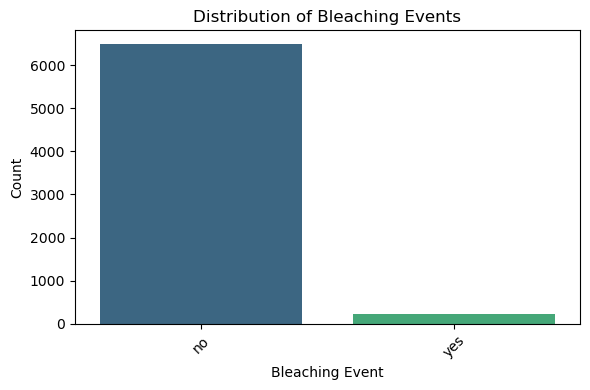

In [13]:
# Plot the distribution of bleaching events
plt.figure(figsize=(6, 4))
sns.countplot(data=df2, x='bleaching', palette='viridis')
plt.title('Distribution of Bleaching Events')
plt.xlabel('Bleaching Event')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [14]:
# Our dataset is pretty unbalanced, let's perform undersampling : 

# Undersampling
from sklearn.utils import resample

# Separate majority and minority classes
majority_class = df2[df2['bleaching'] == 'no']
minority_class = df2[df2['bleaching'] == 'yes']

# Downsample majority class
majority_downsampled = resample(majority_class, 
                                 replace=False,     # Sample without replacement
                                 n_samples=len(minority_class),    # Match minority class
                                 random_state=42)  # Reproducible results

# Combine minority class with downsampled majority class
balanced_df = pd.concat([majority_downsampled, minority_class])

In [15]:
balanced_df

,bleaching,ocean,year,depth,storms,humanimpact,siltation,dynamite,poison,sewage,industrial,commercial
5047,no,atlantic,2000,12.0,yes,moderate,never,none,none,none,none,none
5567,no,red sea,2007,6.0,no,high,occasionally,none,none,none,none,none
2738,no,pacific,2014,4.0,yes,low,never,none,none,low,low,low
434,no,indian,2001,10.0,no,moderate,never,none,none,none,none,none
4867,no,pacific,2002,7.0,yes,low,never,low,none,none,none,none
...,...,...,...,...,...,...,...,...,...,...,...,...
8741,yes,atlantic,1998,10.0,no,moderate,never,low,none,low,none,none
8767,yes,pacific,1999,3.0,no,high,never,low,none,none,none,none
8859,yes,indian,2000,4.0,yes,moderate,never,none,none,low,none,none
8901,yes,pacific,2001,10.0,yes,low,never,none,none,low,none,none


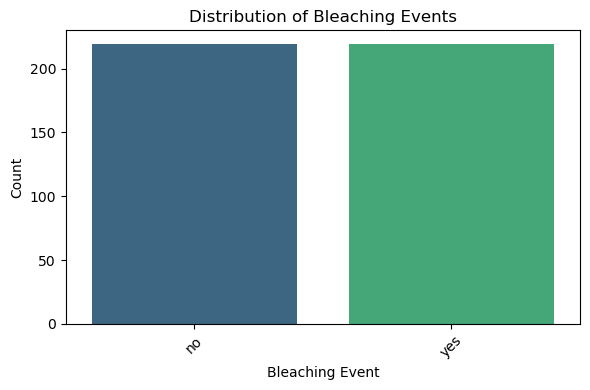

In [16]:
# Plot the distribution of bleaching events
plt.figure(figsize=(6, 4))
sns.countplot(data=balanced_df, x='bleaching', palette='viridis')
plt.title('Distribution of Bleaching Events')
plt.xlabel('Bleaching Event')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

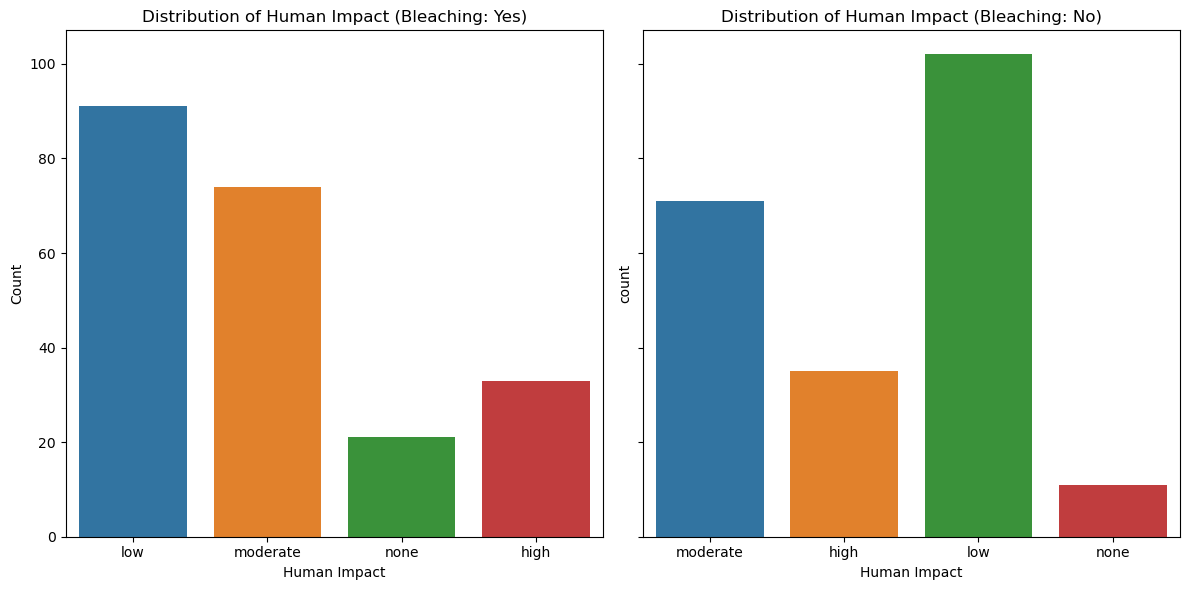

In [17]:
# Set up the figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot the distribution of 'humanimpact' where 'bleaching' is 'yes'
sns.countplot(data=balanced_df[balanced_df['bleaching'] == 'yes'], x='humanimpact', ax=axs[0])
axs[0].set_title('Distribution of Human Impact (Bleaching: Yes)')
axs[0].set_xlabel('Human Impact')
axs[0].set_ylabel('Count')

# Plot the distribution of 'humanimpact' where 'bleaching' is 'no'
sns.countplot(data=balanced_df[balanced_df['bleaching'] == 'no'], x='humanimpact', ax=axs[1])
axs[1].set_title('Distribution of Human Impact (Bleaching: No)')
axs[1].set_xlabel('Human Impact')

# Adjust layout to prevent overlapping of labels
plt.tight_layout()

# Show the plots
plt.show()

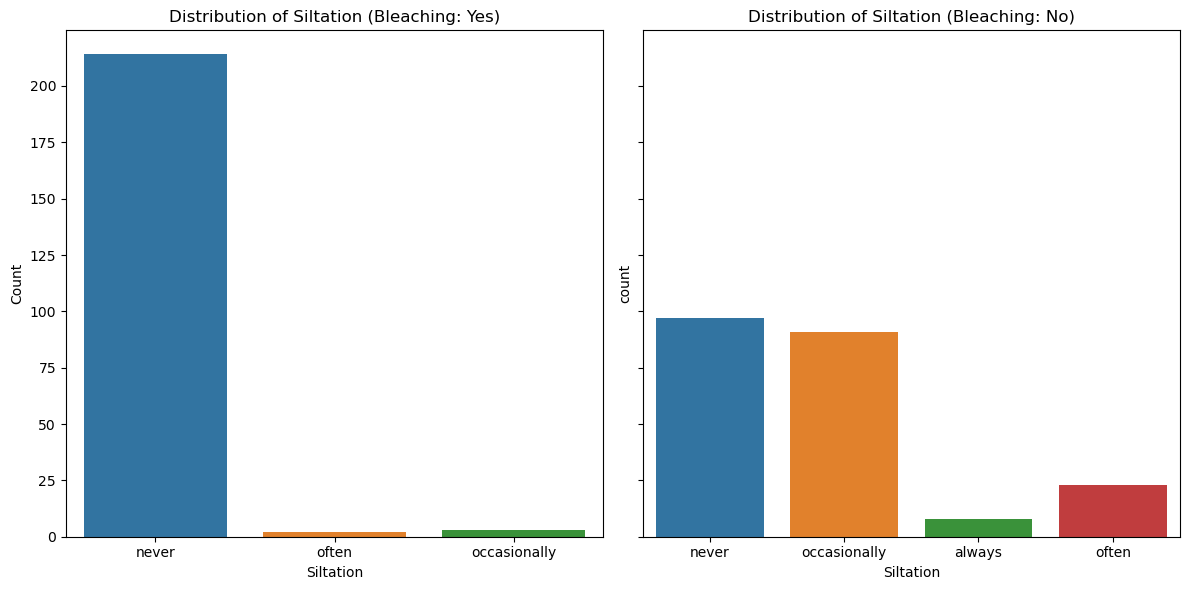

In [18]:
# Set up the figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot the distribution of 'siltation' where 'bleaching' is 'yes'
sns.countplot(data=balanced_df[balanced_df['bleaching'] == 'yes'], x='siltation', ax=axs[0])
axs[0].set_title('Distribution of Siltation (Bleaching: Yes)')
axs[0].set_xlabel('Siltation')
axs[0].set_ylabel('Count')

# Plot the distribution of 'siltation' where 'bleaching' is 'no'
sns.countplot(data=balanced_df[balanced_df['bleaching'] == 'no'], x='siltation', ax=axs[1])
axs[1].set_title('Distribution of Siltation (Bleaching: No)')
axs[1].set_xlabel('Siltation')

# Adjust layout to prevent overlapping of labels
plt.tight_layout()

# Show the plots
plt.show()

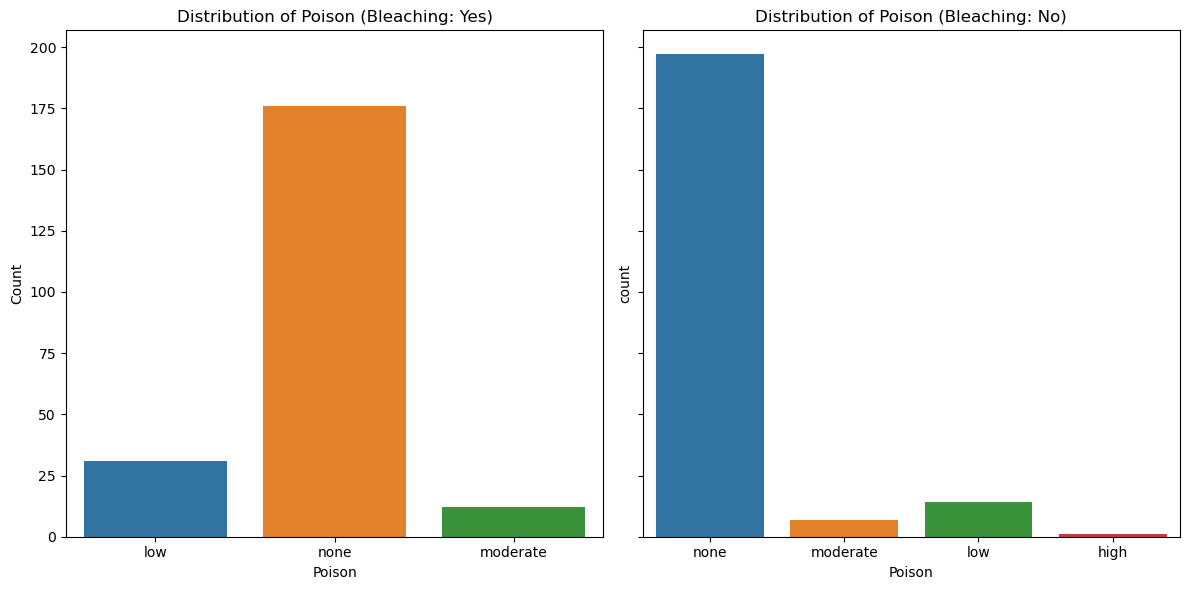

In [19]:
# Set up the figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot the distribution of 'poison' where 'bleaching' is 'yes'
sns.countplot(data=balanced_df[balanced_df['bleaching'] == 'yes'], x='poison', ax=axs[0])
axs[0].set_title('Distribution of Poison (Bleaching: Yes)')
axs[0].set_xlabel('Poison')
axs[0].set_ylabel('Count')

# Plot the distribution of 'poison' where 'bleaching' is 'no'
sns.countplot(data=balanced_df[balanced_df['bleaching'] == 'no'], x='poison', ax=axs[1])
axs[1].set_title('Distribution of Poison (Bleaching: No)')
axs[1].set_xlabel('Poison')

# Adjust layout to prevent overlapping of labels
plt.tight_layout()

# Show the plots
plt.show()

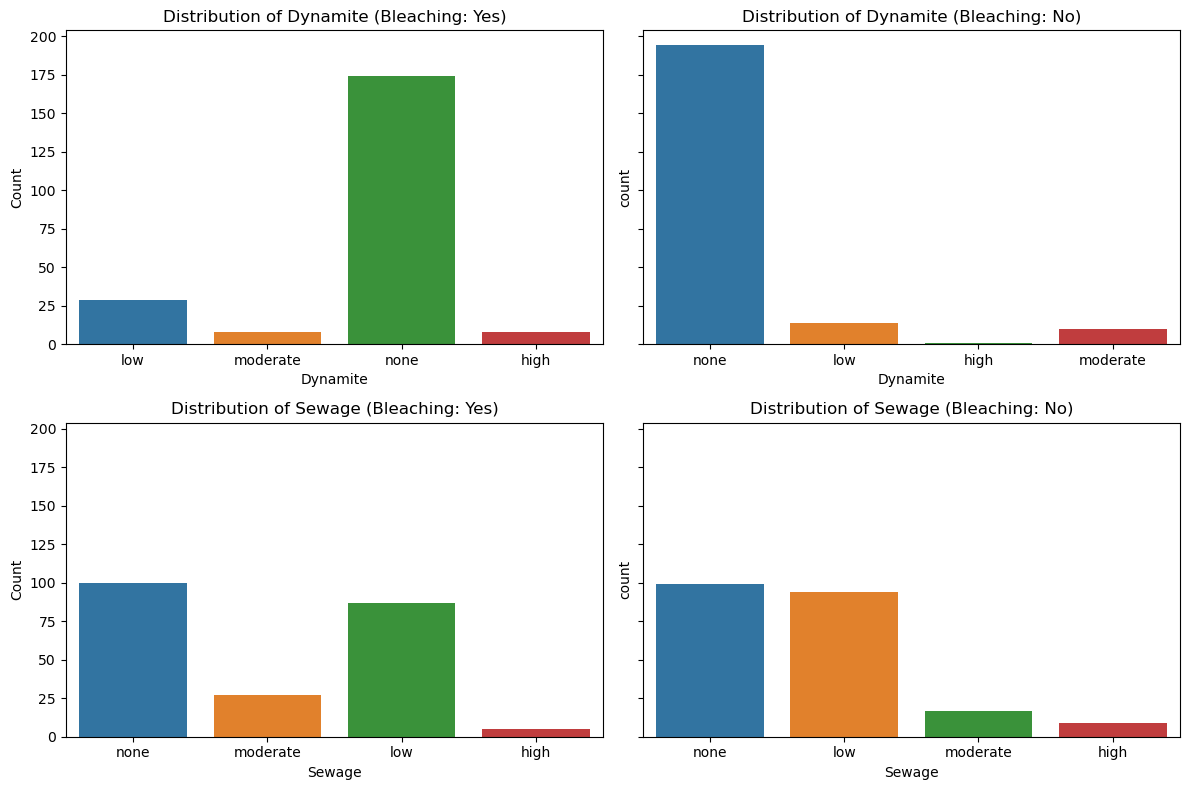

In [20]:
# Set up the figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharey=True)

# Plot the distribution of 'dynamite' where 'bleaching' is 'yes'
sns.countplot(data=balanced_df[balanced_df['bleaching'] == 'yes'], x='dynamite', ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Dynamite (Bleaching: Yes)')
axs[0, 0].set_xlabel('Dynamite')
axs[0, 0].set_ylabel('Count')

# Plot the distribution of 'dynamite' where 'bleaching' is 'no'
sns.countplot(data=balanced_df[balanced_df['bleaching'] == 'no'], x='dynamite', ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Dynamite (Bleaching: No)')
axs[0, 1].set_xlabel('Dynamite')

# Plot the distribution of 'sewage' where 'bleaching' is 'yes'
sns.countplot(data=balanced_df[balanced_df['bleaching'] == 'yes'], x='sewage', ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Sewage (Bleaching: Yes)')
axs[1, 0].set_xlabel('Sewage')
axs[1, 0].set_ylabel('Count')

# Plot the distribution of 'sewage' where 'bleaching' is 'no'
sns.countplot(data=balanced_df[balanced_df['bleaching'] == 'no'], x='sewage', ax=axs[1, 1])
axs[1, 1].set_title('Distribution of Sewage (Bleaching: No)')
axs[1, 1].set_xlabel('Sewage')

# Adjust layout to prevent overlapping of labels
plt.tight_layout()

# Show the plots
plt.show()